In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
!pip install matplotlib
!apt install libproj-dev libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/v1.2.0rel.tar.gz
!pip install pyproj==1.9.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.9.1-1~focal0).
libgeos-dev set to manually installed.
libproj-dev is already the newest version (7.2.1-1~focal0).
libproj-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     | 132.4 MB 16.2 MB/s 0:00:15
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 5.4 MB/s eta 0:00:00
  Created wheel for basemap: filename=basemap-1.2.0-cp38-cp38-linux_x86_64.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyproj: filename=pyproj-1.9.6-cp38-cp38-linux_x86_64.whl size=3855636 sha256=ce5a7d62e8a25b225e468b4c6de86fbc89f1dddd84e9e73abd1137fcc6a616de
  Stored in directory: /root/.cache/pip/wheels/88/f9/15/d2091255dc0aad51e9a83ab7293de72c5c42f5241fb8a9828c
Successfully built pyproj
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.4.1
    Uninstalling pyproj-3.4.1:
      Successfully uninstalled pyproj-3.4.1


In [3]:
!wget -O weather-stations20140101-20141231.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/weather-stations20140101-20141231.csv

--2023-02-21 05:57:23--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/weather-stations20140101-20141231.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 129821 (127K) [text/csv]
Saving to: ‘weather-stations20140101-20141231.csv’

weather-stations201 100%[===================>] 126.78K   139KB/s    in 0.9s    

2023-02-21 05:57:25 (139 KB/s) - ‘weather-stations20140101-20141231.csv’ saved [129821/129821]



In [4]:
filename='weather-stations20140101-20141231.csv'
pdf = pd.read_csv(filename)
pdf.head(5)

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573


In [5]:
pdf = pdf[pd.notnull(pdf["Tm"])]
pdf = pdf.reset_index(drop=True)
pdf.head(5)

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573
4,ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0.0,NaN,13.1,0.0,1.9,...,8.0,NaN,NaN,12.0,NaN,NaN,NaN,258.6,0.0,1012710


<ipython-input-6-6466de1f9345>:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  my_map = Basemap(projection='merc',
<ipython-input-6-6466de1f9345>:18: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  my_map.drawcountries()


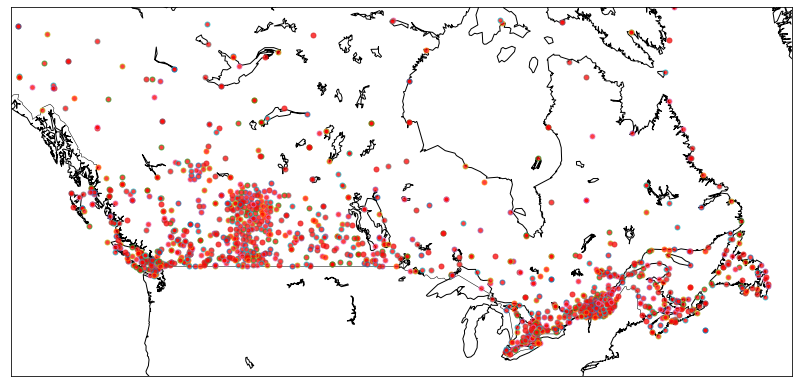

In [6]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)
llon=-140
ulon=-50
llat=40
ulat=65

pdf = pdf[(pdf['Long'] > llon) & (pdf['Long'] < ulon) & (pdf['Lat'] > llat) &(pdf['Lat'] < ulat)]

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='white',alpha=0.3)
xs,ys=my_map(np.asarray(pdf.Long),np.asarray(pdf.Lat))
pdf['xm']=xs.tolist()
pdf['ym']=ys.tolist()
for index,row in pdf.iterrows():
  my_map.plot(row.xm,row.ym,markerfacecolor=([1,0,0]),marker='o',markersize=5,alpha=0.75)
plt.show()

In [7]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import sklearn.utils
sklearn.utils.check_random_state(1000)
Clus_data=pdf[['xm','ym']]
Clus_data=np.nan_to_num(Clus_data)
Clus_data=StandardScaler().fit_transform(Clus_data)
Clus_data

array([[-1.16833902, -0.33176141],
       [-1.18518021, -0.35499148],
       [-1.18169137, -0.35394619],
       ...,
       [ 1.46577713,  1.86125634],
       [ 1.64788589,  0.95789607],
       [ 1.2814717 ,  0.53978899]])

In [8]:
db=DBSCAN(eps=0.15,min_samples=10).fit(Clus_data)
core_samples_mask=np.zeros_like(db.labels_,dtype=bool)
core_samples_mask[db.core_sample_indices_]=True
labels=db.labels_
pdf["Clus_db"]=labels

real_cluster_number=len(set(labels)) - (1 if -1 in labels else 0)
cluster_number=len(set(labels))

print(real_cluster_number)
print(cluster_number)
print(set(labels)) #-1 indicates outlier
pdf[["Stn_Name","Tx","Tm","Clus_db"]].head(5)

5
6
{0, 1, 2, 3, 4, -1}


,Stn_Name,Tx,Tm,Clus_db
0,CHEMAINUS,13.5,8.2,0
1,COWICHAN LAKE FORESTRY,15.0,7.0,0
2,LAKE COWICHAN,16.0,6.8,0
3,DUNCAN KELVIN CREEK,14.5,7.7,0
4,ESQUIMALT HARBOUR,13.1,8.8,0


<ipython-input-9-d42c6415a64c>:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  my_map = Basemap(projection='merc',
<ipython-input-9-d42c6415a64c>:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  my_map.drawcountries()
<ipython-input-9-d42c6415a64c>:17: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np

Cluster 0, Avg Temp: -5.538747553816046
Cluster 1, Avg Temp: 1.9526315789473685
Cluster 2, Avg Temp: -9.195652173913045
Cluster 3, Avg Temp: -15.300833333333333
Cluster 4, Avg Temp: -7.769047619047619


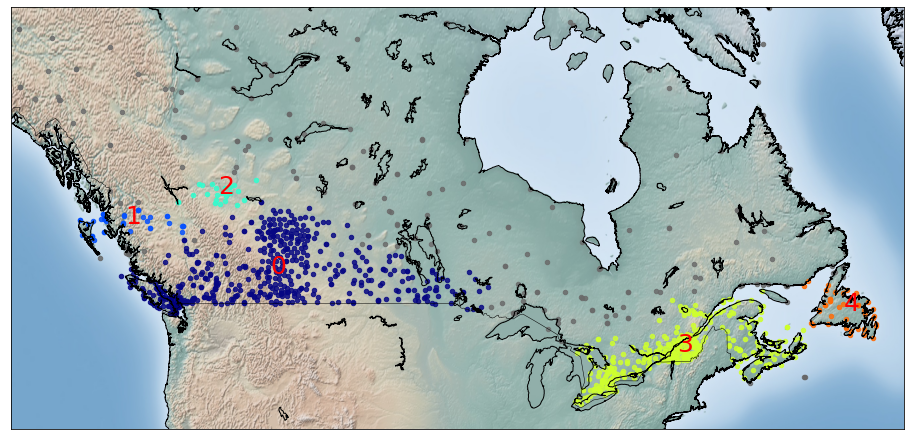

In [9]:
#Clustering based on the location
from mpl_toolkits.basemap import Basemap
from pylab import rcParams
rcParams['figure.figsize']=(16,15)
my_map = Basemap(projection='merc',
            resolution = 'h', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat,
            urcrnrlon=ulon, urcrnrlat=ulat)
#projection mercator for cylindrical projection. 
#resolution h for high resolution
my_map.drawcoastlines()
my_map.drawcountries()
my_map.shadedrelief()
my_map.fillcontinents(color='white', alpha=0.03)#alpha for transparency
colors=plt.get_cmap('jet')(np.linspace(0.0,1.0,cluster_number))
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = pdf[pdf.Clus_db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        print ("Cluster "+str(clust_number)+', Avg Temp: '+ str(np.mean(clust_set.Tm)))

In [10]:
#clustering based on location, maximum and minimum temperature
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = pdf[['xm','ym','Tx','Tm','Tn']]
Clus_dataSet=np.nan_to_num(Clus_dataSet)
Clus_dataSet=StandardScaler().fit_transform(Clus_dataSet)

db = DBSCAN(eps=0.3, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf["Clus_Db"]=labels
realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))
print(set(labels)) 
pdf[["Stn_Name","Tx","Tm","Clus_Db"]].head(15)

{0, 1, 2, 3, 4, 5, 6, 7, 8, -1}


,Stn_Name,Tx,Tm,Clus_Db
0,CHEMAINUS,13.5,8.2,0
1,COWICHAN LAKE FORESTRY,15.0,7.0,0
2,LAKE COWICHAN,16.0,6.8,0
3,DUNCAN KELVIN CREEK,14.5,7.7,0
4,ESQUIMALT HARBOUR,13.1,8.8,0
5,GALIANO NORTH,13.5,8.9,0
6,MALAHAT,12.7,7.2,0
7,NORTH COWICHAN,14.7,7.7,0
8,NORTH PENDER ISLAND,14.0,8.6,0
9,RACE ROCKS,15.6,9.6,0


<ipython-input-11-2993597d3f42>:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  my_map = Basemap(projection='merc',resolution='h',area_thresh=1000.0,llcrnrlon=llon, llcrnrlat=llat,
<ipython-input-11-2993597d3f42>:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  my_map.drawcountries()
<ipython-input-11-2993597d3f42>:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#dep

Cluster 0, Avg Temp: 6.221192052980132
Cluster 1, Avg Temp: 6.790000000000001
Cluster 2, Avg Temp: -0.49411764705882344
Cluster 3, Avg Temp: -13.87720930232558
Cluster 4, Avg Temp: -4.186274509803922
Cluster 5, Avg Temp: -16.301503759398496
Cluster 6, Avg Temp: -13.599999999999998
Cluster 7, Avg Temp: -9.753333333333334
Cluster 8, Avg Temp: -4.258333333333334


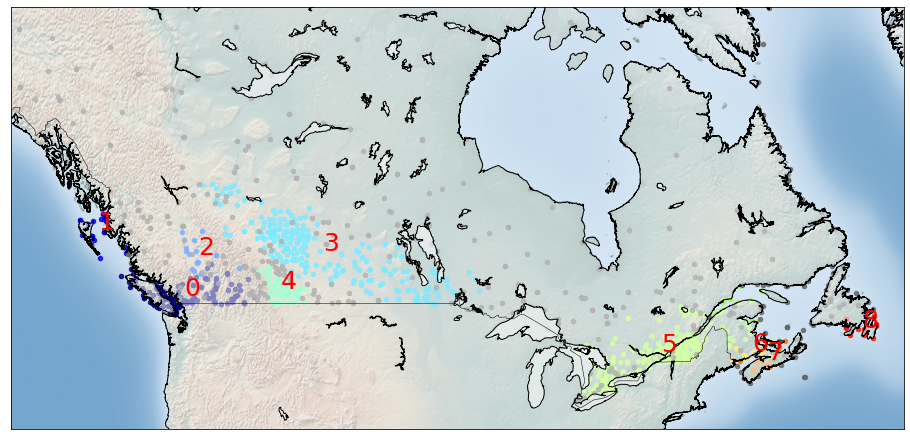

In [11]:
#visualization on the base of location and temperature
from mpl_toolkits.basemap import Basemap
from pylab import rcParams
rcParams['figure.figsize']=(16,15)

my_map = Basemap(projection='merc',resolution='h',area_thresh=1000.0,llcrnrlon=llon, llcrnrlat=llat,
            urcrnrlon=ulon, urcrnrlat=ulat)
my_map.drawcountries()
my_map.drawcoastlines()
my_map.fillcontinents(color='white',alpha=0.5)
my_map.shadedrelief()

colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = pdf[pdf.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        print ("Cluster "+str(clust_number)+', Avg Temp: '+ str(np.mean(clust_set.Tm)))
